In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<Axes: xlabel='0', ylabel='1'>

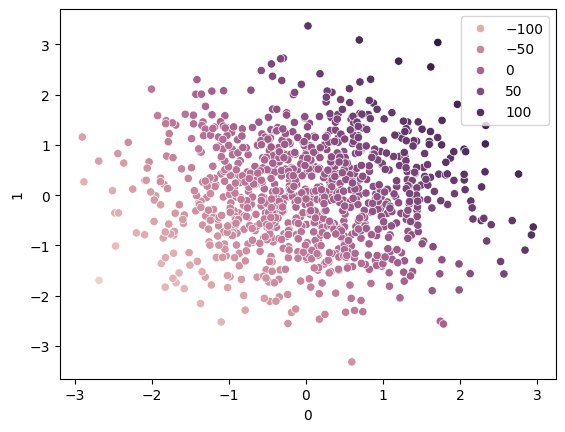

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [7]:
from sklearn.svm import SVR

In [8]:
regressor=SVR(kernel="linear")

In [9]:
regressor.fit(X_train,Y_train)

SVR(kernel='linear')

In [10]:
regressor.coef_

array([[38.61123666, 26.63591443]])

In [11]:
y_pred=regressor.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
print(r2_score(Y_test,y_pred))

0.9955499618779227


In [14]:
from sklearn.model_selection import GridSearchCV
params={
    "C":[1,2,3,10,4,9,50],
    "gamma":[1,0.2,0.01,0.001,0.03,2,2.01],
    "kernel":["linear"],
    "epsilon":[0.01,0.1,0.2,0.3]
}

In [15]:
grid=GridSearchCV(SVR(),cv=5,param_grid=params,verbose=3)

In [16]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.995 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.995 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.01, ker

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 4, 9, 50],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.2, 0.01, 0.001, 0.03, 2, 2.01],
                         'kernel': ['linear']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 50, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [18]:
y_pred=grid.predict(X_test)

In [19]:
print(r2_score(Y_test,y_pred))

0.9956225829489297
